In [72]:

!pip install pandas scikit-learn matplotlib seaborn


In [161]:
import pandas as pd
import numpy as np

# Load the training data
df = pd.read_csv('/Users/mushtariy/Desktop/aviachipta-narxini-bashorat-qilish/train_data.csv')
df




,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,19997,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,19998,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,19999,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


In [163]:

df.airline.value_counts()

airline
Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: count, dtype: int64

In [165]:
df.source_city.value_counts()

source_city
Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: count, dtype: int64

In [167]:
df.destination_city.value_counts()

destination_city
Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: count, dtype: int64

In [169]:
df.departure_time.value_counts()

departure_time
Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: count, dtype: int64

In [171]:
df.arrival_time.value_counts()

arrival_time
Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: count, dtype: int64

In [173]:
df.stops.value_counts()

stops
one            16666
zero            2440
two_or_more      894
Name: count, dtype: int64

In [175]:
df['class'].value_counts()

class
Economy     13753
Business     6247
Name: count, dtype: int64

In [177]:
df['duration'].min()


0.83

In [179]:
df['duration'].max()


38.58

In [181]:
df['duration'].median()

11.25

## Preprocessing


In [223]:
# df = df.drop('id', axis = 1)
# df = df.drop('flight', axis = 1)

# df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
# # # Display the column names of the DataFrame
print(df.columns)



Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_Bangalore',
       'source_Chennai', 'source_Delhi', 'source_Hyderabad', 'source_Kolkata',
       'source_Mumbai', 'dest_Bangalore', 'dest_Chennai', 'dest_Delhi',
       'dest_Hyderabad', 'dest_Kolkata', 'dest_Mumbai', 'arrival_Afternoon',
       'arrival_Early_Morning', 'arrival_Evening', 'arrival_Late_Night',
       'arrival_Morning', 'arrival_Night', 'departure_Afternoon',
       'departure_Early_Morning', 'departure_Evening', 'departure_Late_Night',
       'departure_Morning', 'departure_Night'],
      dtype='object')


In [219]:
df.stops = pd.factorize(df.stops)[0]


df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,14.25,21,7212,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,0,1.75,7,5292,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,1,9.58,5,60553,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0,0,6.75,28,5760,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,1,0,2.00,4,10712,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,7.92,45,3153,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
19996,0,0,5.83,24,3911,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19997,2,0,35.33,17,14822,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
19998,0,0,16.33,21,6450,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [225]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)




AttributeError: 'DataFrame' object has no attribute 'source_city'

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,14.25,21,7212,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,0,1.75,7,5292,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,1,9.58,5,60553,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0,0,6.75,28,5760,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,1,0,2.00,4,10712,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,7.92,45,3153,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
19996,0,0,5.83,24,3911,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19997,2,0,35.33,17,14822,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
19998,0,0,16.33,21,6450,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [227]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,14.25,21,7212,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
1,1,0,1.75,7,5292,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,1,9.58,5,60553,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0,0,6.75,28,5760,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,1,0,2.00,4,10712,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,7.92,45,3153,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
19996,0,0,5.83,24,3911,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
19997,2,0,35.33,17,14822,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
19998,0,0,16.33,21,6450,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [229]:
print(df.columns)

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_Bangalore',
       'source_Chennai', 'source_Delhi', 'source_Hyderabad', 'source_Kolkata',
       'source_Mumbai', 'dest_Bangalore', 'dest_Chennai', 'dest_Delhi',
       'dest_Hyderabad', 'dest_Kolkata', 'dest_Mumbai', 'arrival_Afternoon',
       'arrival_Early_Morning', 'arrival_Evening', 'arrival_Late_Night',
       'arrival_Morning', 'arrival_Night', 'departure_Afternoon',
       'departure_Early_Morning', 'departure_Evening', 'departure_Late_Night',
       'departure_Morning', 'departure_Night'],
      dtype='object')


In [231]:
# List of boolean columns
boolean_columns = ['airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST', 
                   'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara', 
                   'source_Bangalore', 'source_Chennai', 'source_Delhi', 
                   'source_Hyderabad', 'source_Kolkata', 'source_Mumbai', 
                   'dest_Bangalore', 'dest_Chennai', 'dest_Delhi', 'dest_Hyderabad', 
                   'dest_Kolkata', 'dest_Mumbai', 'arrival_Afternoon', 
                   'arrival_Early_Morning', 'arrival_Evening', 'arrival_Late_Night', 
                   'arrival_Morning', 'arrival_Night', 'departure_Afternoon', 
                   'departure_Early_Morning', 'departure_Evening', 
                   'departure_Late_Night', 'departure_Morning', 'departure_Night']

# Convert all boolean columns to numeric (1 for True, 0 for False)
df[boolean_columns] = df[boolean_columns].astype(int)


In [233]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,14.25,21,7212,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,0,1.75,7,5292,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,1,9.58,5,60553,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,6.75,28,5760,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,2.00,4,10712,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,7.92,45,3153,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
19996,0,0,5.83,24,3911,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19997,2,0,35.33,17,14822,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
19998,0,0,16.33,21,6450,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## Training Regression Model

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [254]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [256]:
reg.score(X_test, y_test)

0.9724706145412401

In [268]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9724706145412401
MAE:  1932.1289836666667
MSE:  13971932.73590361
RMSE:  3737.9048591294577


Text(0.5, 1.0, 'Prediction VS Actual Price')

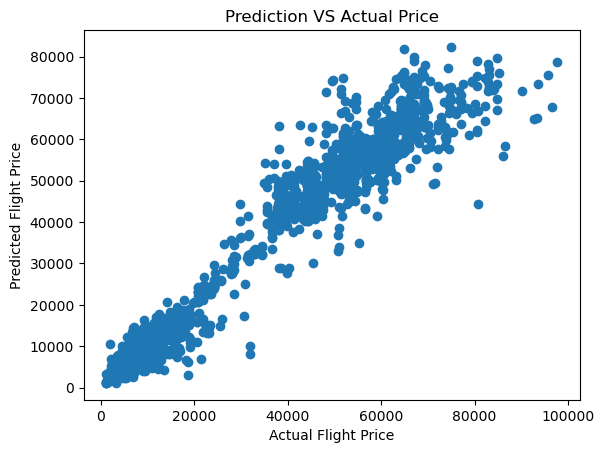

In [270]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")


In [272]:
df.price.describe()

count     20000.000000
mean      20960.281700
std       22775.459535
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      114523.000000
Name: price, dtype: float64

In [276]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse=True)


[('class', 0.8812405661881901),
 ('duration', 0.05450033873563426),
 ('days_left', 0.0201314951072519),
 ('airline_Air_India', 0.005023924789149064),
 ('airline_Vistara', 0.004965694536360947),
 ('source_Delhi', 0.0033251361626771793),
 ('dest_Delhi', 0.002737932049051667),
 ('source_Mumbai', 0.002220148035941739),
 ('dest_Kolkata', 0.002072009200721347),
 ('dest_Mumbai', 0.0019142103850368784),
 ('source_Kolkata', 0.0018059476816588349),
 ('dest_Hyderabad', 0.001652413631393184),
 ('stops', 0.0015773743727896144),
 ('arrival_Evening', 0.001357099734767295),
 ('dest_Bangalore', 0.0013124006544973064),
 ('source_Hyderabad', 0.0012770295493565462),
 ('source_Bangalore', 0.001249156007403857),
 ('arrival_Night', 0.0012121478100724397),
 ('source_Chennai', 0.0011265553965849493),
 ('departure_Evening', 0.0011198772643192482),
 ('arrival_Afternoon', 0.0010966984089033965),
 ('departure_Morning', 0.0010390876998847113),
 ('departure_Early_Morning', 0.0009251705437939295),
 ('departure_Night'

In [278]:
df.days_left.describe()

count    20000.000000
mean        25.924150
std         13.624874
min          1.000000
25%         14.000000
50%         26.000000
75%         38.000000
max         49.000000
Name: days_left, dtype: float64

<BarContainer object of 10 artists>

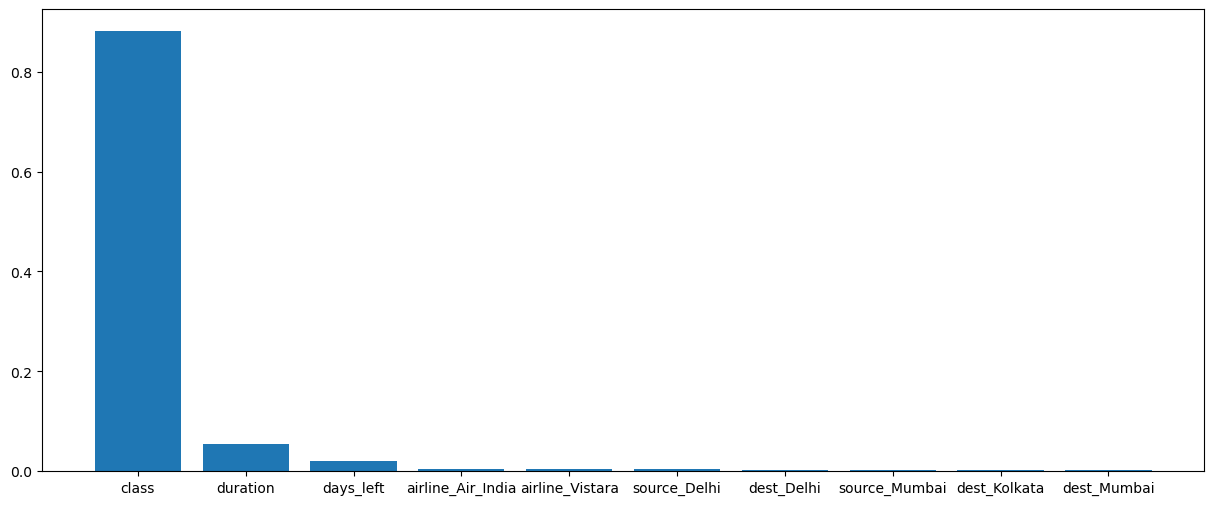

In [284]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Param1: A, B, C
# #Param2: X, Y, Z
# #AX AY Az, BX, BY, BZ

# reg = RandomForestRegressor(n_jobs=-1)

# param_grid = {
#     'n_estimators': [100,200,300],
#     'max_depth' : [None, 10, 20, 30],
#     'min_samples_split' : [2, 5, 10],
#     'min_samples_leaf' : [1, 2, 4],
#     'max_features' : ['auto','sqrt']
    
# }

# grid_search = GridSearchCV(reg, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
    

In [295]:
!pip3 install scipy


In [303]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1, 5),
    'max_features' : [1.0, 'auto','sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

# random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,  scoring='neg_mean_squared-error', verbose=2, random_state=10, n_jobs=-1)
# random_search.fit(X_train, y_train)
# best_regressor=random_search.best_estimator_

# Corrected scoring parameter
random_search = RandomizedSearchCV(
    estimator=reg, 
    param_distributions=param_dist, 
    n_iter=2, 
    cv=3,  
    scoring='neg_mean_squared_error',  # Corrected parameter value
    verbose=2, 
    random_state=10, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)
best_regressor = random_search.best_estimator_


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-package

In [305]:
best_regressor.score(X_test, y_test)

0.9721523348808325

In [307]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(X_test)

print("R2: ", r2_score(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  0.9721523348808325
MAE:  1971.9057152156952
MSE:  14133468.56143385
RMSE:  3759.4505664303992


Text(0.5, 1.0, 'Prediction VS Actual Price')

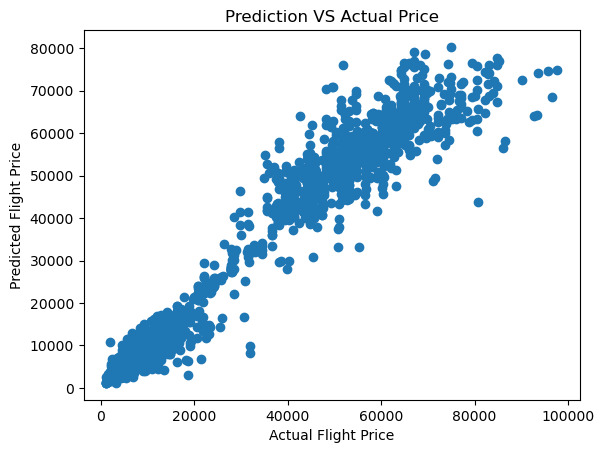

In [309]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")

In [ ]:
best_regressor.pr